In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts as darts
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [2]:
#load csv file
df = pd.read_csv('anomaly_dataset.csv', sep=',')

#show first 5 rows
df.head()

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739


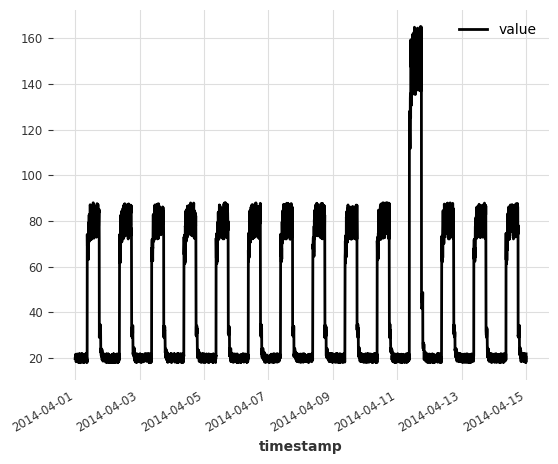

In [3]:
#Save as a TimeSeries object
series = darts.TimeSeries.from_dataframe(df, 'timestamp', 'value')

#plot the time series
series.plot()

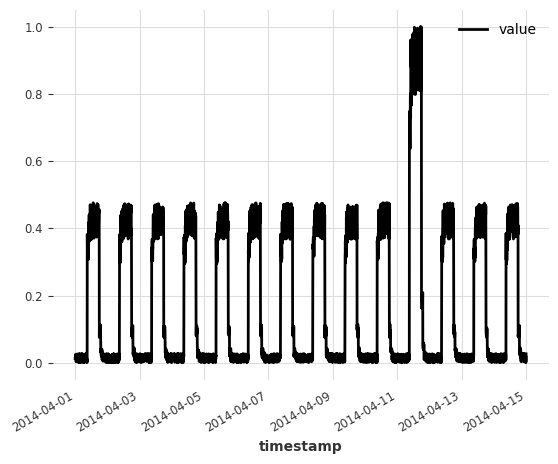

In [4]:
from darts.dataprocessing.transformers import Scaler
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

series_scaled.plot(label='value')
plt.legend();

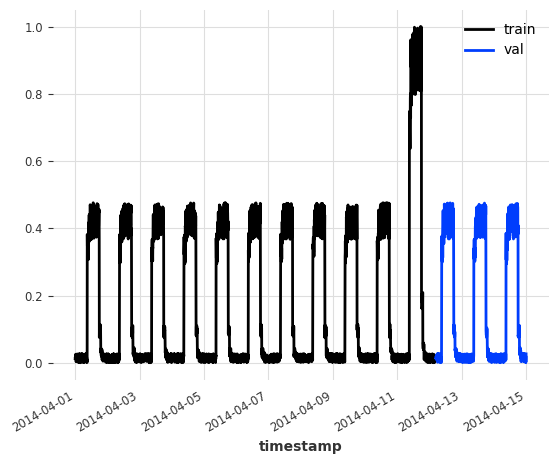

In [5]:
train, val = series_scaled.split_before(0.80)

train.plot(label='train')
val.plot(label='val')

In [6]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel, StatsForecastAutoARIMA, Prophet, TFTModel
from darts.metrics import mape, smape, mase, mse, r2_score, mae, rmse

In [7]:
def predict(model_air, train_air, series_air_scaled):

    pred = model_air.predict(n=1300, series=train_air)

    series_air_scaled.plot(label='actual')
    pred.plot(label='forecast')
    plt.legend();
    #metrics
    print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))
    print('SMAPE = {:.2f}%'.format(smape(series_air_scaled, pred)))
    print('MASE = {:.2f}'.format(mase(series_air_scaled, pred, train_air)))
    print('MSE = {:.2f}'.format(mse(series_air_scaled, pred)))
    print('R2 = {:.2f}'.format(r2_score(series_air_scaled, pred)))
    print('MAE = {:.2f}'.format(mae(series_air_scaled, pred)))
    print('RMSE = {:.2f}'.format(rmse(series_air_scaled, pred)))

In [8]:
epochs = 5000

In [9]:
model_air = NBEATSModel(
    input_chunk_length=24, 
    output_chunk_length=12, 
    n_epochs=epochs, 
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

model_air.fit(train, verbose=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimat

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5000` reached.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 581.55%
SMAPE = 125.25%
MASE = 9.11
MSE = 0.08
R2 = -1.12
MAE = 0.21
RMSE = 0.28


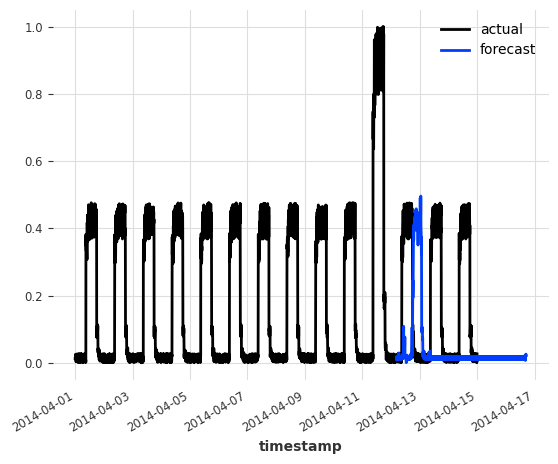

In [10]:
predict(model_air, train, series_scaled)

In [52]:
df.head()
#convert the first column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [53]:
#set the first column as index
df.set_index('timestamp', inplace=True)
#show first 5 rows
df.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [54]:
import pandas as pd
s_train = df
from adtk.data import validate_series
s_train = validate_series(s_train)
print(s_train)

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739
...                        ...
2014-04-14 23:35:00  18.074649
2014-04-14 23:40:00  21.002014
2014-04-14 23:45:00  20.566713
2014-04-14 23:50:00  18.254193
2014-04-14 23:55:00  21.863147

[4032 rows x 1 columns]


[<AxesSubplot: >]

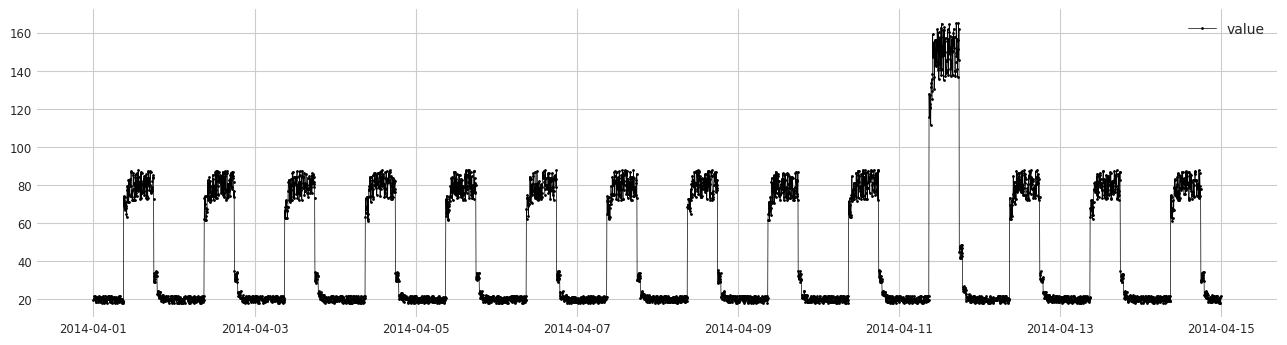

In [55]:
from adtk.visualization import plot
plot(s_train)

In [61]:
import pandas as pd
import numpy as np
from adtk.data import validate_series
from adtk.detector import UnivariateAnomalyDetector


ImportError: cannot import name 'UnivariateAnomalyDetector' from 'adtk.detector' (/home/joseribeiro/anaconda3/envs/darts/lib/python3.8/site-packages/adtk/detector/__init__.py)

In [75]:
import pandas as pd
from adtk.data import validate_series
from adtk.detector import OutlierDetector, GeneralizedESDTestAD
from adtk.visualization import plot

In [76]:
csv_file = "anomaly_dataset.csv"
df = pd.read_csv(csv_file, parse_dates=['timestamp'], index_col='timestamp')


In [77]:
series = df['value']
series = validate_series(series)

# Convert the series to a DataFrame
series = series.to_frame()


In [78]:
gesd_ad = GeneralizedESDTestAD()



In [79]:
outlier_detector = OutlierDetector(gesd_ad)
outliers = outlier_detector.fit_detect(series)



ValueError: Incompatible indexer with DataFrame

In [ ]:
plot(series, outliers)
